# Example of changing colors

In [57]:
import pandas as pd 
import cv2 # pip install opencv-python 
import numpy as np 
import sklearn 
import skimage # pip install scikit-image
from matplotlib import pyplot as plt
from skimage.transform import rotate
from skimage.util import random_noise
import random
from skimage.transform import warp, AffineTransform
import mxnet as mx
from mxnet import nd
from mxnet.gluon.data.vision import transforms

In [121]:
train = pd.read_csv('./train.csv')
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [122]:
train = train.iloc[:,3:].values.reshape(-1,28,28,1).astype(np.float32)  
train /= 255.0 # normalize 

# Original image

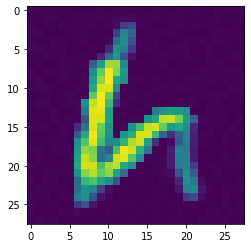

In [248]:
sample = train[10]
plt.imshow(sample)

# Changing the brightness 

1.385454001436913


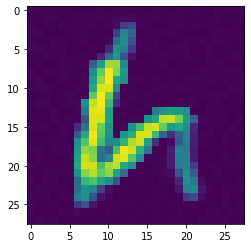

In [249]:
brightness = 0.5
alpha = 1.0 + random.uniform(-brightness, brightness) 
print(alpha)
brightness_modified = sample * alpha 
plt.imshow(brightness_modified)

# Apply Distortions 

The idea is to apply continuous shift of the rows or columns of our image guided by trigonometric functions. The resulting image would be "wavy" in horizontal or vertical directions. 

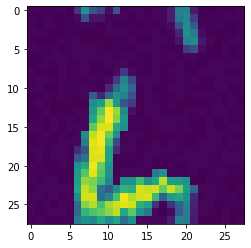

In [256]:
# orientation should be either 'hor' or 'ver' 
# example of vertical distortion 
def distort(img, orientation): 
    img_dist = img.copy()  
    x_scale = random.choice([0.01, 0.02, 0.03, 0.04])
    y_scale = random.choice([2, 4, 6, 8, 10]) 
    def shift(x): 
        return int(y_scale * np.sin(np.pi * x * x_scale))
    for c in range(1): 
        for i in range(img.shape[orientation.startswith('ver')]): 
            if orientation.startswith('ver'): 
                img_dist[:,i,c] = np.roll(img[:,i,c],shift(i)) 
            else: 
                img_dist[i,:,c] = np.roll(img[i,:,c],shift(i))
    return img_dist 

distorted_img = distort(sample, "ver")
plt.imshow(distorted_img)

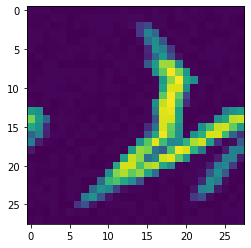

In [257]:
# example of horizontal distortion
distorted_img = distort(sample, "hor")
plt.imshow(distorted_img)

# Random crops

21


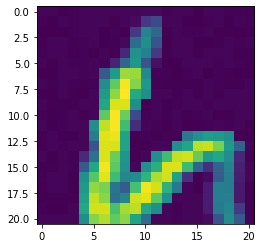

In [281]:
def random_crop(img): 
    img = img.copy() 
    size = random.randint(19,22) 
    crop_size = (size,size)
    w,h = img.shape[:2]
    x,y = np.random.randint(h-crop_size[0]), np.random.randint(w-crop_size[1])
    img = img[y:y+crop_size[0], x:x+crop_size[1]] 
    return img 

randomly_cropped_img = random_crop(sample)
plt.imshow(randomly_cropped_img)